# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math  
import time 
from numpy import linalg   
import random   


In [2]:
random.seed(42) 

$$f'(x) = \arctan x + \dfrac{x}{1+x^2} - \dfrac{x}{1+x^2} = \arctan x$$ 
$$f'(x) = 0 \Leftrightarrow x = 0$$
$$f''(x) = \dfrac{1}{1+x^2}$$
$$ x_{k+1} = x_k - \dfrac{f'(x_k)}{f''(x_k)} = x_k - (1+x_k^2)\arctan x_k$$

$$|x-(1+x^2)\arctan{x}| < x, \forall x < 1.4$$

In [35]:
M = 0.64

In [21]:
def grad(x): 
    return np.arctan(x)

In [22]:
def hessian(x): 
    return 1/(1 + x**2)

In [23]:
class GradientDescent: 
    def __init__(self, max_iter, alpha, start_point): 
        self.max_iter = max_iter 
        self.history = []  
        self.alpha = alpha
        self.x = start_point 
        
    def fit(self): 
        for i in range(self.max_iter): 
            self.history.append(abs(self.x))  
            self.x = self.x - self.alpha * grad(self.x) 

In [24]:
class NewtonDescent: 
    def __init__(self, max_iter, start_point): 
        self.max_iter = max_iter 
        self.history = [] 
        self.x = start_point 
        
    def fit(self): 
        for i in range(self.max_iter):  
            self.history.append(abs(self.x))
            self.x = self.x - grad(self.x)/hessian(self.x) 

In [25]:
gd_1 = GradientDescent(100, 1/10, 1.3) 
gd_2 = GradientDescent(100, 1/10, 1.5)  
ngd_1 = NewtonDescent(100, 1.3) 
ngd_2 = NewtonDescent(100, 1.5)

In [26]:
gd_1.fit() 
gd_2.fit() 
ngd_1.fit() 
ngd_2.fit() 

/tmp/ipykernel_710239/841414632.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1/(1 + x**2)
/tmp/ipykernel_710239/779314309.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  self.x = self.x - grad(self.x)/hessian(self.x)
/tmp/ipykernel_710239/779314309.py:10: RuntimeWarning: invalid value encountered in double_scalars
  self.x = self.x - grad(self.x)/hessian(self.x)


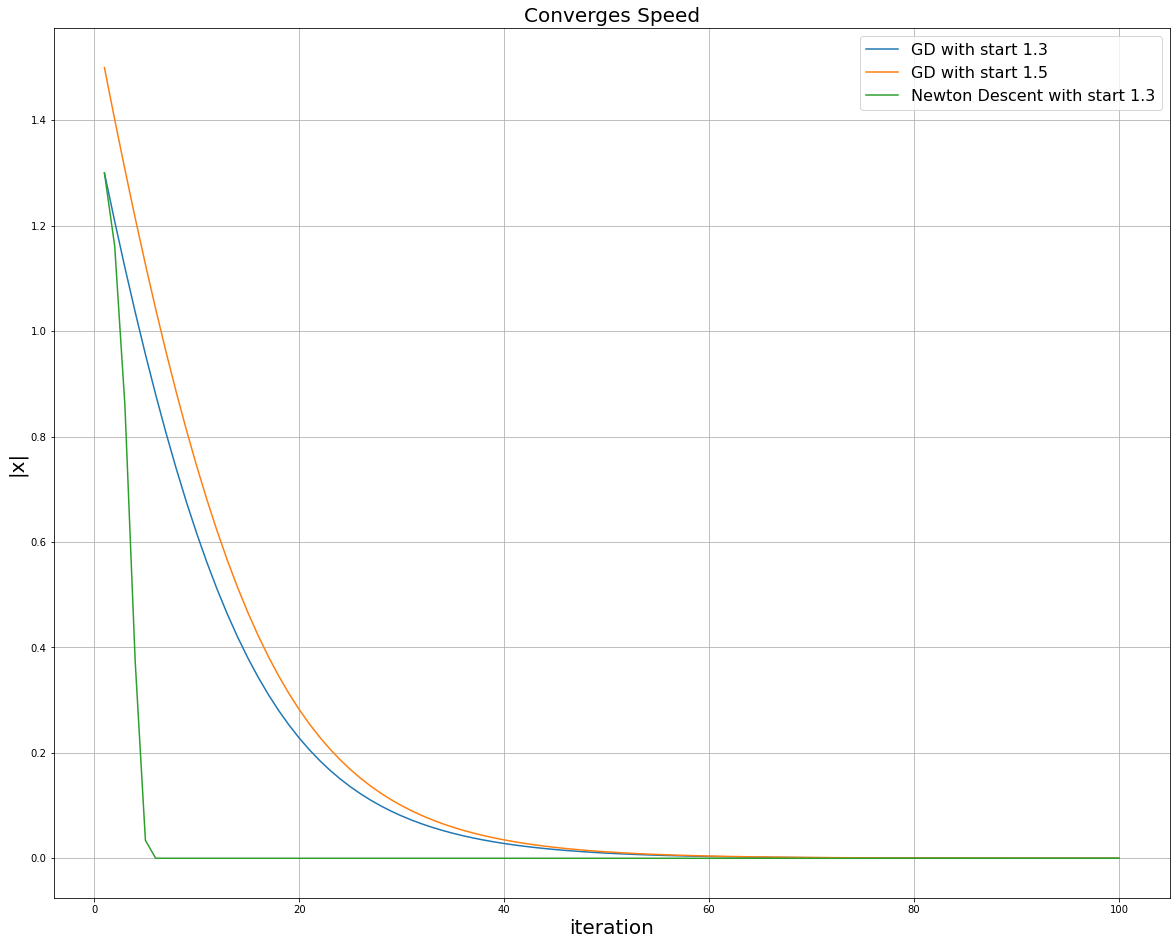

In [32]:
plt.figure(figsize=(20, 16))
plt.title('Converges Speed', fontsize=20) 
plt.xlabel('iteration', fontsize=20) 
plt.ylabel('|x|', fontsize=20)
plt.plot(range(1, gd_1.max_iter + 1, 1), gd_1.history, label='GD with start 1.3')  
plt.plot(range(1, gd_2.max_iter + 1, 1), gd_2.history, label='GD with start 1.5') 
plt.plot(range(1, ngd_1.max_iter + 1, 1), ngd_1.history, label='Newton Descent with start 1.3')  
#plt.plot(range(1, ngd_2.max_iter + 1, 1), ngd_2.history, label='Newton Descent with start 1.5')
plt.grid()
plt.legend(fontsize=16) 

Согласуемся с теорией, при стартовой точке 1.5, метод Ньютона расходится

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

Итерация кубического метода:

$$x^{k  + 1} = \arg\underset{x \in \mathbb{R}}{\min}(f(x^k) + <\nabla f(x^k), x - x^k> + \frac{1}{2} <x - x^k, \nabla^2 f(x^k)(x - x^k)> + \frac{M}{6}||x^k - x||^3)$$ 

$$f'(x^k) + f''(x^k)(x-x^k)+\dfrac{M}{2}|x-x^k|(x-x^k) = 0$$ 

при
$$x < x^k: x - x^k = \dfrac{f''(x^k) \pm\sqrt{f''(x^k)^2+2Mf'(x^k)}}{M} \Rightarrow x = x^k + \dfrac{f''(x^k) -\sqrt{f''(x^k)^2+2Mf'(x^k)}}{M}$$ 
иначе решения, нет.  

$M$ ищем через $|f''(x)-f''(y)|=|\frac{1}{1+x^2}-\frac{1}{1+y^2}| = |\frac{x^2-y^2}{(1+x^2)(1+y^2)}|\leq|(x+y)(x-y)|\leq |x_0||x-y|$, т.е $M = |x_0|$

Тогда итерация перепишется в виде:

$$x^{k + 1} = x^k - \frac{\sqrt{(\nabla^2f(x^k))^2 + 2M\nabla f(x^k}) - \nabla^2f(x^k)}{M}$$

In [33]:
def f(x): 
    return x * np.arctan(x) - 1/2 * np.log(1 + x**2) 

In [48]:
class ArmijoNewton: 
    def __init__(self, max_iter, alpha, start_point): 
        self.x = start_point 
        self.history = [] 
        self.r = 0.8 
        self.eps = 0.3  
        self.alpha = alpha 
        self.max_iter = max_iter  
        
    def fit(self): 
        for i in range(self.max_iter): 
            g = grad(self.x)   
            self.history.append(abs(g))
            while (f(self.x - self.alpha * hessian(self.x)**(-1) * g) >= f(self.x) - self.eps * self.alpha * g**2 * hessian(self.x)**(-1)):
                self.alpha *= self.r  
            self.x = self.x - self.alpha * hessian(self.x)**(-1)*g 

In [49]:
class CubeNewton: 
    def __init__(self, max_iter, start_point): 
        self.x = start_point 
        self.history = []   
        self.max_iter = max_iter 
        
    def fit(self): 
        for i in range(self.max_iter): 
            g = grad(self.x) 
            h = hessian(self.x) 
            self.history.append(abs(g)) 
            self.x = self.x - 1/M * (np.sqrt(h**2 + 2 * M * g) - h)

In [54]:
class IncNewton: 
    def __init__(self, max_iter, alpha, start_point): 
        self.x = start_point 
        self.history = [] 
        self.alpha = alpha   
        self.max_iter = max_iter 
        
    def fit(self): 
        for i in range(self.max_iter): 
            self.alpha = (np.log(i + 2))**0.5 
            g = grad(self.x) 
            self.x = self.x - self.alpha * hessian(self.x)**(-1)*g 
            self.history.append(abs(g)) 

In [55]:
na = ArmijoNewton(30, 1/10, 1.5) 
cn = CubeNewton(30, 1.5) 
incn = IncNewton(30, 1/10, 1.5) 

In [56]:
na.fit() 
cn.fit() 
incn.fit()

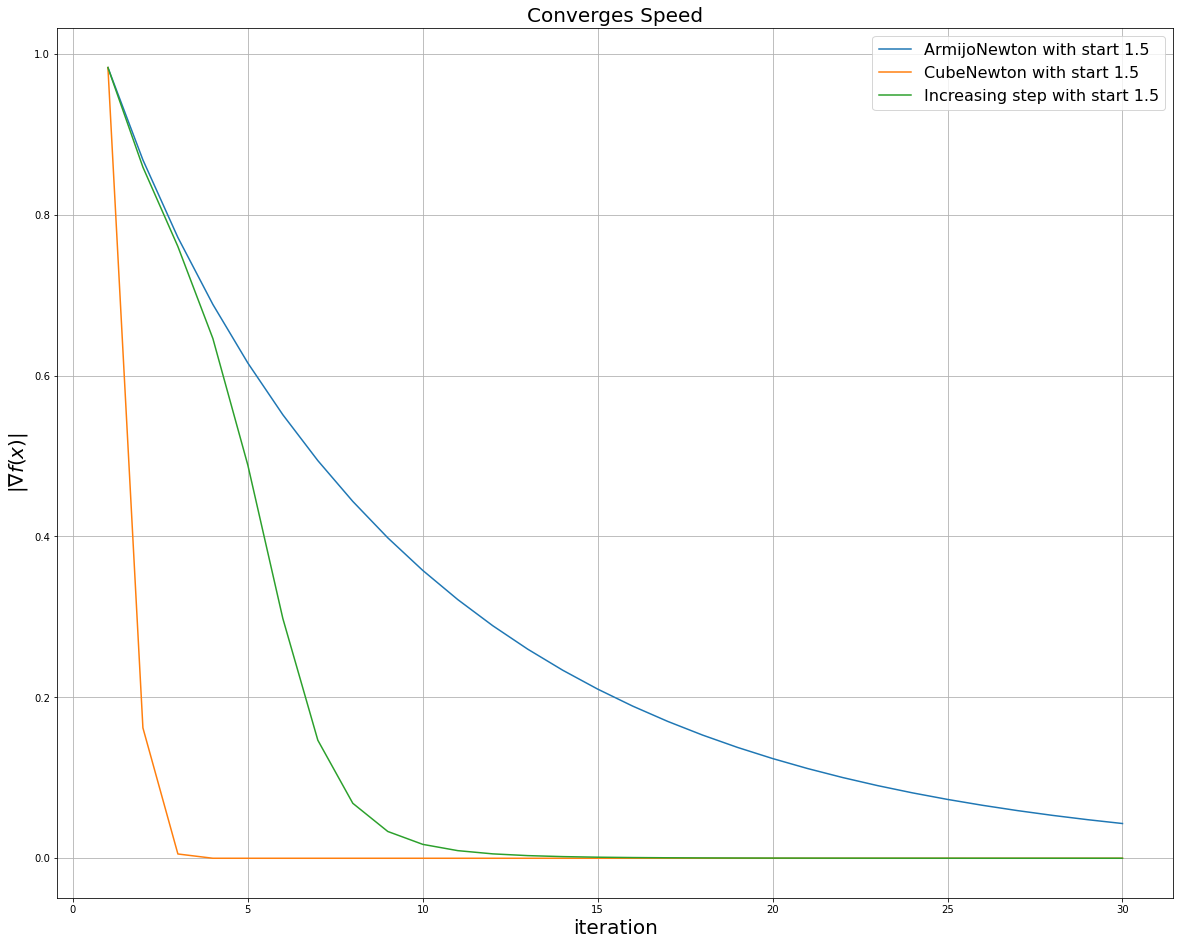

In [58]:
plt.figure(figsize=(20, 16))
plt.title('Converges Speed', fontsize=20) 
plt.xlabel('iteration', fontsize=20) 
plt.ylabel(r'$|\nabla f(x)|$', fontsize=20)
plt.plot(range(1, na.max_iter + 1, 1), na.history, label='ArmijoNewton with start 1.5')  
plt.plot(range(1, cn.max_iter + 1, 1), cn.history, label='CubeNewton with start 1.5') 
plt.plot(range(1, incn.max_iter + 1, 1), incn.history, label='Increasing step with start 1.5')  
#plt.plot(range(1, ngd_2.max_iter + 1, 1), ngd_2.history, label='Newton Descent with start 1.5')
plt.grid()
plt.legend(fontsize=16)

Получаем, что данные методы решают проблему, если брать стартовую точку $1.5$

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

In [90]:
dataset = "mushrooms.txt"  

In [91]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape  

In [92]:
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [93]:
def grad(w): 
    g = np.zeros(len(w)) 
    for i in range(X_train.shape[0]): 
        g += y_train[i] * X_train[i] / (1 + np.exp(y_train[i] * np.dot(X_train[i], w))) 
    return (-g / X_train.shape[0] + 10 / 100 * w)

In [94]:
def hessian(w): 
    h = np.zeros((X_train.shape[1], X_train.shape[1])) 
    for i in range(X_train.shape[0]): 
        h += np.exp(y_train[i] * np.dot(X_train[i], w)) * np.outer(X_train[i], X_train[i]) / ((1 + np.exp(y_train[i] * np.dot(X_train[i], w)))**2)
    return h/len(X_train) + 10./100*np.eye(len(w))

In [95]:
class GradientDescent: 
    def __init__(self, lr, max_iter): 
        self.w = None 
        self.lr = lr 
        self.max_iter = max_iter 
        self.history = [] 
        self.acc = [] 
    
    def fit(self): 
        self.w = np.zeros(d)  
        for i in range(self.max_iter): 
            g = grad(self.w) 
            self.w -= self.lr * g 
            self.history.append(np.dot(g, g)) 
            if(i % 10 == 0): 
                 self.acc.append(accuracy_score(y_test, np.round(2 / (1 + np.exp(-np.dot(X_test, self.w)))) - 1)) 
                    


In [96]:
class NewtonDescent: 
    def __init__(self, max_iter, start_point): 
        self.max_iter = max_iter 
        self.w = start_point  
        self.history = [] 
        self.acc = [] 
    
    def fit(self): 
        #self.acc.append(accuracy_score(y_test, np.round(2 / (1 + np.exp(-np.dot(X_test, self.w)))) - 1))  
        for i in range(self.max_iter): 
            g = grad(self.w) 
            invh = np.linalg.inv(hessian(self.w)) 
            self.w -= np.dot(invh, g) 
            self.history.append(np.dot(g, g)) 
            self.acc.append(accuracy_score(y_test, np.round(2 / (1 + np.exp(-np.dot(X_test, self.w)))) - 1))  

Скомбинируем эти два метода, посмотрим, что получится: 

In [97]:
gd = GradientDescent(1/30, 10**3) 
gd.fit() 

In [98]:
nd = NewtonDescent(10, gd.w)
nd.fit()

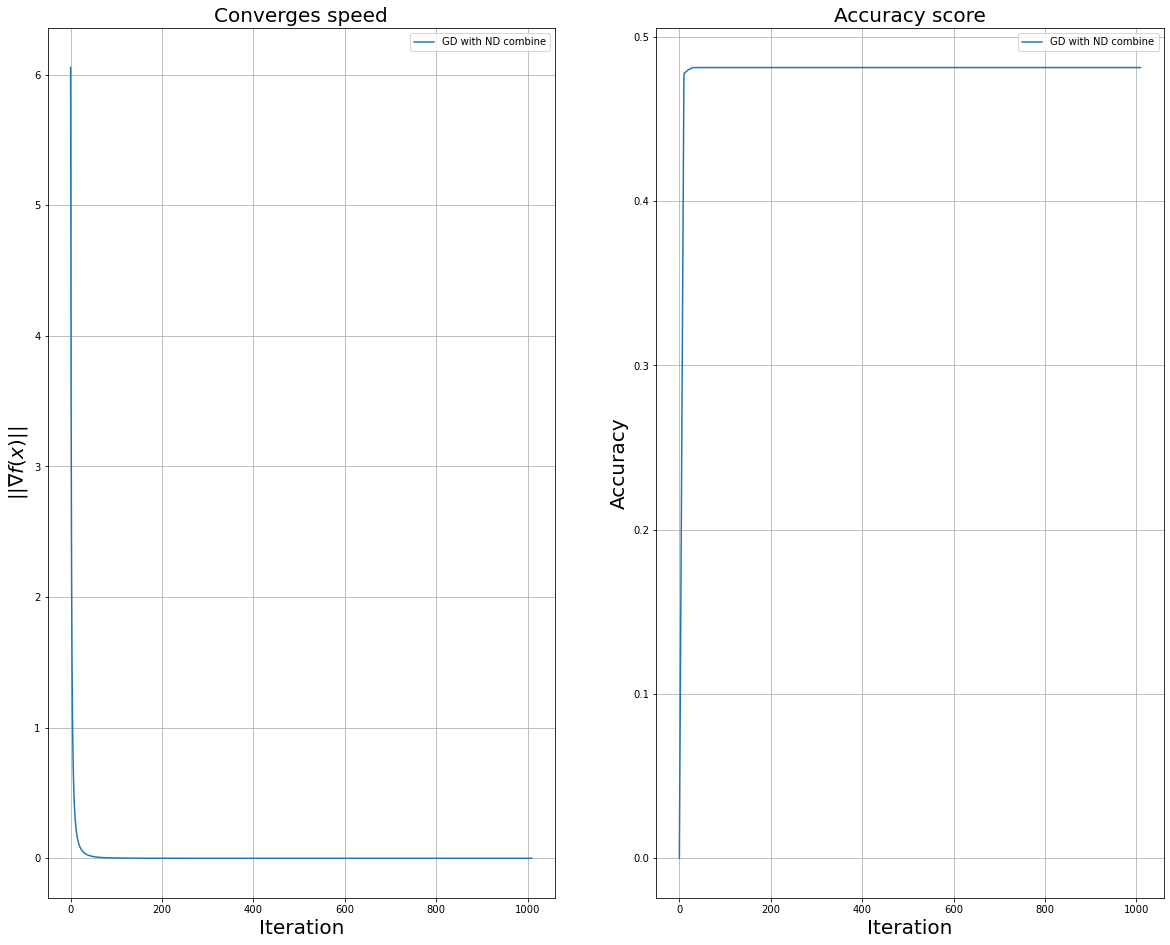

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(20, 16))  

ax[0].set_title('Converges speed', fontsize=20)  
ax[0].set_xlabel('Iteration', fontsize=20) 
ax[0].set_ylabel(r'$||\nabla f(x)||$', fontsize=20) 
ax[0].plot(range(gd.max_iter + nd.max_iter), gd.history + nd.history, label="GD with ND combine") 
ax[0].grid()   
ax[0].legend() 

ax[1].set_title('Accuracy score', fontsize=20) 
ax[1].set_xlabel('Iteration', fontsize=20) 
ax[1].set_ylabel('Accuracy', fontsize=20)   
ax[1].plot(list(range(0, gd.max_iter, 10)) + list(range(gd.max_iter, gd.max_iter + nd.max_iter)), gd.acc + nd.acc, label="GD with ND combine")
ax[1].grid() 
ax[1].legend() 

plt.show()

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [102]:
class Broyden: 
    def __init__(self, max_iter, lr = 1/7, start_point = np.zeros(d)): 
        self.history = [] 
        self.acc = [] 
        self.w = start_point 
        self.lr = lr 
        self.max_iter = max_iter 
        
    def fit(self): 
        temp = self.w
        self.acc.append(accuracy_score(y_test, np.round(2 / (1 + np.exp(- X_test @ self.w))) - 1))
        H = np.eye(d)
        for i in range(self.max_iter):
            g = grad(self.w)
            p = -(la.inv(H)).dot(g)
            r = 1
            while np.dot(grad(self.w + r * p), p) < 0.99 * np.dot(grad(self.w), p):
                r *= 0.9
            temp = self.w + r * p
            s = temp - self.w
            y = grad(temp) - g
            H += np.outer((y - H.dot(s)),s) / np.dot(s, s)
            self.history.append(np.dot(g, g))
            self.acc.append(accuracy_score(y_test, np.round(2 / (1 + np.exp(- X_test @ self.w))) - 1))
            self.w = temp

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [ ]:
#ответ